<h1> Machine Learning Lab Assignment - 2 </h2>




```
Kaushik Prajapati - 202201472
```



In [46]:
import numpy as np
import matplotlib.pyplot as plt

<p> (a) Generate 20 real number for the variable X from the uniform distribution U [0,1]

In [47]:
x = np.random.uniform(0, 1, 20)
print("List of 20 real numbers for uniformly distrubuted random variable x: \n", x)

List of 20 real numbers for uniformly distrubuted random variable x: 
 [0.4056254  0.0541318  0.6317895  0.51660843 0.66612045 0.50941008
 0.51433348 0.98391568 0.05760213 0.32992079 0.57265989 0.21599138
 0.16292936 0.15372842 0.0767345  0.91802694 0.28990012 0.3071076
 0.15135454 0.55408926]


<p> (b) Construct the training set $T = \{ (x_1,y_1), (x_2,y_2),......, (x_{20},y_{20})\} $ using the relation $$ y_i = sin(2 π x_i) + ε_i $$  
<p align="center"> where $ε_i $ ~ $ N(0,0.25) $

In [48]:
x_train = np.random.uniform(0, 1, 20)
y_train = np.sin(2 * np.pi * x_train) + np.random.normal(0, 0.25, 20)
data_train = np.array(list(zip(x_train, y_train)))
print("Training Data Set: \n", data_train)

Training Data Set: 
 [[ 0.93819657 -0.48456517]
 [ 0.30382264  0.83058477]
 [ 0.67139807 -0.82650726]
 [ 0.44212891  0.69952521]
 [ 0.59564147 -0.4745979 ]
 [ 0.4696019   0.38786791]
 [ 0.84906534 -0.83923628]
 [ 0.84379327 -1.06823848]
 [ 0.15184214  0.96294557]
 [ 0.53008097 -0.06356901]
 [ 0.91507489 -0.51186007]
 [ 0.92417567 -0.56685035]
 [ 0.76853979 -0.93222809]
 [ 0.02647936  0.20618056]
 [ 0.00780373 -0.22105924]
 [ 0.22268874  0.56917872]
 [ 0.77869978 -0.80270227]
 [ 0.57136668 -0.33103105]
 [ 0.76772364 -0.4897291 ]
 [ 0.09948488  0.31813005]]


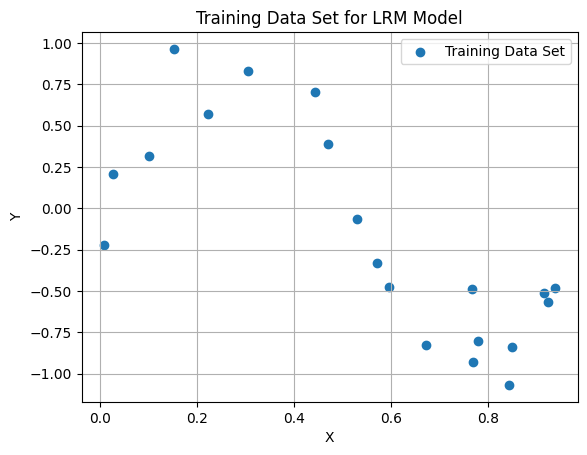

In [49]:
# Training Data Set
plt.scatter(x_train, y_train, label='Training Data Set')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Training Data Set for LRM Model')
plt.legend()
plt.grid()
plt.show()

<p> (c) In the similar way construct a testing set of size 50, $$ Test = \{ (x'_1,y'_1),(x'_2,y'_2),......,(x'_{50},y'_{50}) \} $$

In [50]:
x_test = np.random.uniform(0, 1, 50)
y_test = np.sin(2 * np.pi * x_test) + np.random.normal(0, 0.25, 50)
data_test = np.array(list(zip(x_test, y_test)))
print("Training Data Set: \n", data_test)

Training Data Set: 
 [[ 0.20246296  0.98880282]
 [ 0.94917426 -0.14213583]
 [ 0.87745452 -0.48635494]
 [ 0.76510184 -0.97168902]
 [ 0.86966085 -0.54280676]
 [ 0.6713104  -0.94593591]
 [ 0.27407018  1.03818792]
 [ 0.23393444  0.94454022]
 [ 0.6653445  -1.12804818]
 [ 0.64324241 -0.70792738]
 [ 0.54781635 -0.02958714]
 [ 0.19988076  0.8983207 ]
 [ 0.21850887  1.06224289]
 [ 0.79162571 -0.84967959]
 [ 0.46548845  0.43930871]
 [ 0.56394859  0.26624129]
 [ 0.3994386   0.48050258]
 [ 0.37879267  1.22997855]
 [ 0.76283496 -0.34764621]
 [ 0.27920177  1.20663632]
 [ 0.18388374  0.84836845]
 [ 0.77222094 -1.3940591 ]
 [ 0.38857304  0.67479452]
 [ 0.17929877  0.65420998]
 [ 0.27079311  0.68160623]
 [ 0.52882266 -0.55135177]
 [ 0.24917508  0.86337554]
 [ 0.19494261  0.83845797]
 [ 0.10785974  0.6090215 ]
 [ 0.60129017 -0.74549523]
 [ 0.98412206 -0.34914641]
 [ 0.49213599 -0.07835972]
 [ 0.42800347  0.61007968]
 [ 0.89843769 -0.65018049]
 [ 0.13856695  0.94181045]
 [ 0.57249779 -0.54554749]
 [ 0.24

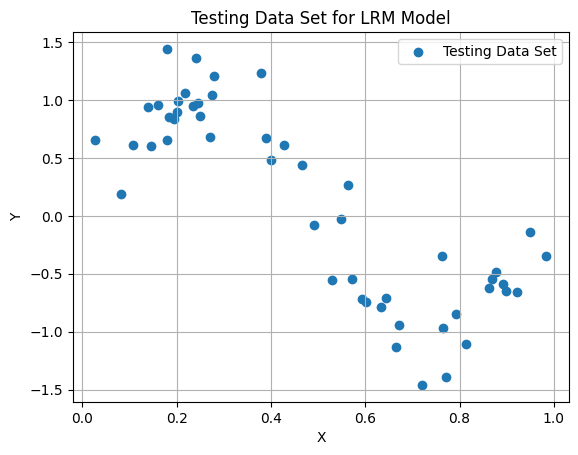

In [51]:
# Testing Data Set
plt.scatter(x_test, y_test, label='Testing Data Set')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Testing Data Set for LRM Model')
plt.legend()
plt.grid()
plt.show()

<p> (d) Estimate the regularized least squared polynomial regression model of order $M = 1,2,3,9$ using the training set $T$. For example for $M=1$ , we need to estimate $F(x) = β_1x + β_0$. For $M = 2$, $F(x) = β_2x^2 + β_1x + β_0$. </p>

*   All subparts from d to h comes under this section only



<p> RMSE Function, Train LRM Function, Prediction LRM function and Generate A matrix Function implementations.

In [52]:
def generateAMatrix(M, X):
    A = []
    for x in X:
        row = []
        for i in range(M, -1, -1):
            row.append(x ** i)
        A.append(np.array(row))
    return np.array(A)

def train_regularized_regression_model(A, y, k):

    n = len(A[0])
    At = np.transpose(A)
    At_A = At.dot(A)
    kI = k * np.identity(n)
    At_A_KI = At_A + kI
    At_A_KI_inv = np.linalg.inv(At_A_KI)
    At_A_KI_inv_At = At_A_KI_inv.dot(At)
    u = At_A_KI_inv_At.dot(y)
    return u

def train_regression_model(A, y):
    At = np.transpose(A)
    At_A = At.dot(A)
    At_A_inv = np.linalg.inv(At_A)
    At_A_inv_At = At_A_inv.dot(At)
    u = At_A_inv_At.dot(y)
    return u

def predict_regression_model(M, X, u):

    x = np.array(X)
    y = np.zeros(len(x), dtype=float)
    for i in range(M, -1, -1):
        y += u[M-i] * (x ** i)
    return y

def RMSE(y_true, y_pred):
    n = len(y_true)
    rmse = 0.0
    for i in range(n):
        rmse += ((y_true[i]-y_pred[i]) ** 2)
    rmse /= n
    rmse = np.sqrt(rmse)
    return rmse

x_cpy = np.array(sorted(x_test))
x_cpy_tr = np.array(sorted(x_train))

<h4> Regression Model for $M=1$.
<h5> (i) For Training Data Set


Estimated coefficients for M = 1, λ = 0:  [-1.4940716   0.63070822]
RMSE for λ = 0:  0.7223113535386788

Estimated coefficients for M = 1, λ = 0.2:  [-1.32254385  0.53209667]
RMSE for λ = 0.2:  0.6956204351074643



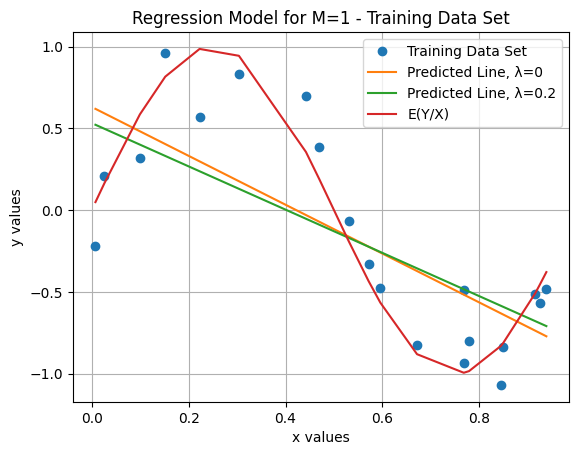

In [53]:
# M = 1
A1_tr = generateAMatrix(M = 1, X = x_train)
k_tr = 0.2

# Normal Regression
u1_tr = train_regression_model(A1_tr, y_train)
p1_tr = predict_regression_model(M = 1, X = x_cpy_tr, u = u1_tr)

# (e) estimated coefficients for M = 1, λ = 0
print("\nEstimated coefficients for M = 1, λ = 0: ", u1_tr)

# (f) RMSE for λ = 0
rmse1_tr = RMSE(y_train, p1_tr)
print("RMSE for λ = 0: ", rmse1_tr)

# Regularized Regression
u1_tr_r = train_regularized_regression_model(A1_tr, y_train, k=k_tr)
p1_tr_r = predict_regression_model(M = 1, X = x_cpy_tr, u = u1_tr_r)

# (e) estimated coefficients for M = 1, λ = k
print(f"\nEstimated coefficients for M = 1, λ = {k_tr}: ", u1_tr_r)

# (f) RMSE for λ = k_tr
rmse1_tr_r = RMSE(y_train, p1_tr_r)
print(f"RMSE for λ = {k_tr}: ", rmse1_tr_r, end="\n\n")

# (g)
plt.plot(x_train, y_train, 'o', label='Training Data Set')
plt.plot(x_cpy_tr, p1_tr, label=f'Predicted Line, λ=0')
plt.plot(x_cpy_tr, p1_tr_r, label=f'Predicted Line, λ={k_tr}')
plt.plot(x_cpy_tr, np.sin(2 * np.pi * x_cpy_tr), label='E(Y/X)')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Regression Model for M=1 - Training Data Set')
plt.legend()
plt.grid()
plt.show()

<h5> (ii) For Testing Data Set


Estimated coefficients for M = 1, λ = 0:  [-1.4940716   0.63070822]
RMSE for λ = 0:  0.9288998937134701

Estimated coefficients for M = 1, λ = 0.2:  [-1.32254385  0.53209667]
RMSE for λ = 0.2:  0.913422380395321



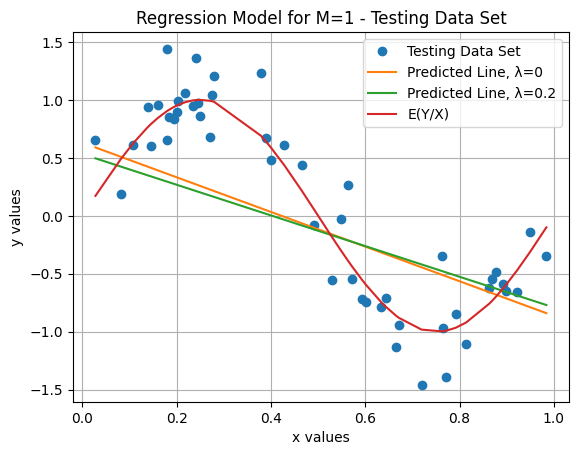

In [54]:
# M = 1
A1 = generateAMatrix(M = 1, X = x_train)
k = 0.2

# Normal Regression
u1 = train_regression_model(A1, y_train)
p1 = predict_regression_model(M = 1, X = x_cpy, u = u1)

# (e) estimated coefficients for M = 1, λ = 0
print("\nEstimated coefficients for M = 1, λ = 0: ", u1)

# (f) RMSE for λ = 0
rmse1 = RMSE(y_test, p1)
print("RMSE for λ = 0: ", rmse1)

# Regularized Regression
u1_r = train_regularized_regression_model(A1, y_train, k=k)
p1_r = predict_regression_model(M = 1, X = x_cpy, u = u1_r)

# (e) estimated coefficients for M = 1, λ = k
print(f"\nEstimated coefficients for M = 1, λ = {k}: ", u1_r)

# (f) RMSE for λ = k
rmse1_r = RMSE(y_test, p1_r)
print(f"RMSE for λ = {k}: ", rmse1_r, end="\n\n")

# (h)
plt.plot(x_test, y_test, 'o', label='Testing Data Set')
plt.plot(x_cpy, p1, label=f'Predicted Line, λ=0')
plt.plot(x_cpy, p1_r, label=f'Predicted Line, λ={k}')
plt.plot(x_cpy, np.sin(2 * np.pi * x_cpy), label='E(Y/X)')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Regression Model for M=1 - Testing Data Set')
plt.legend()
plt.grid()
plt.show()

<h4> Regression Model for $M=2$.
<h5> (i) For Training Data Set


Estimated coefficients for M = 2, λ = 0:  [-1.84708648  0.29063052  0.38000367]
RMSE for λ = 0:  0.7514108626919266

Estimated coefficients for M = 2, λ = 0.2:  [-0.99578756 -0.4571982   0.45040848]
RMSE for λ = 0.2:  0.7230404548682542



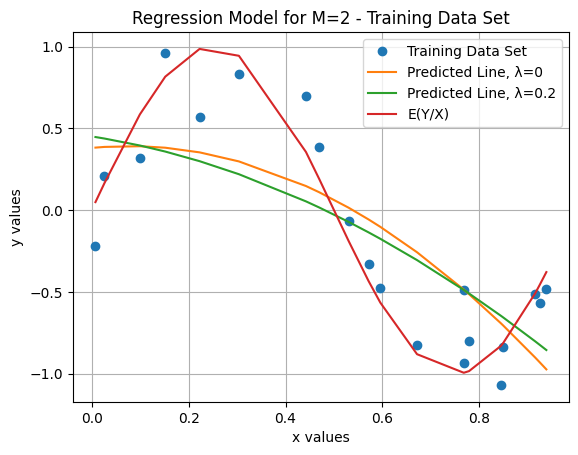

In [55]:
# M = 2
A2_tr = generateAMatrix(M = 2, X = x_train)
k_tr = 0.2

# Normal Regression
u2_tr = train_regression_model(A2_tr, y_train)
p2_tr = predict_regression_model(M = 2, X = x_cpy_tr, u = u2_tr)

# (e) estimated coefficients for M = 2, λ = 0
print("\nEstimated coefficients for M = 2, λ = 0: ", u2_tr)

# (f) RMSE for λ = 0
rmse2_tr = RMSE(y_train, p2_tr)
print("RMSE for λ = 0: ", rmse2_tr)

# Regularized Regression
u2_tr_r = train_regularized_regression_model(A2_tr, y_train, k=k_tr)
p2_tr_r = predict_regression_model(M = 2, X = x_cpy_tr, u = u2_tr_r)

# (e) estimated coefficients for M = 2, λ = k
print(f"\nEstimated coefficients for M = 2, λ = {k_tr}: ", u2_tr_r)

# (f) RMSE for λ = k_tr
rmse2_tr_r = RMSE(y_train, p2_tr_r)
print(f"RMSE for λ = {k_tr}: ", rmse2_tr_r, end="\n\n")

# (g)
plt.plot(x_train, y_train, 'o', label='Training Data Set')
plt.plot(x_cpy_tr, p2_tr, label=f'Predicted Line, λ=0')
plt.plot(x_cpy_tr, p2_tr_r, label=f'Predicted Line, λ={k_tr}')
plt.plot(x_cpy_tr, np.sin(2 * np.pi * x_cpy_tr), label='E(Y/X)')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Regression Model for M=2 - Training Data Set')
plt.legend()
plt.grid()
plt.show()

<h5> (ii) For Testing Data Set


Estimated coefficients for M = 2, λ = 0:  [-1.84708648  0.29063052  0.38000367]
RMSE for λ = 0:  0.9301074722579363

Estimated coefficients for M = 2, λ = 0.2:  [-0.99578756 -0.4571982   0.45040848]
RMSE for λ = 0.2:  0.9204205501624663



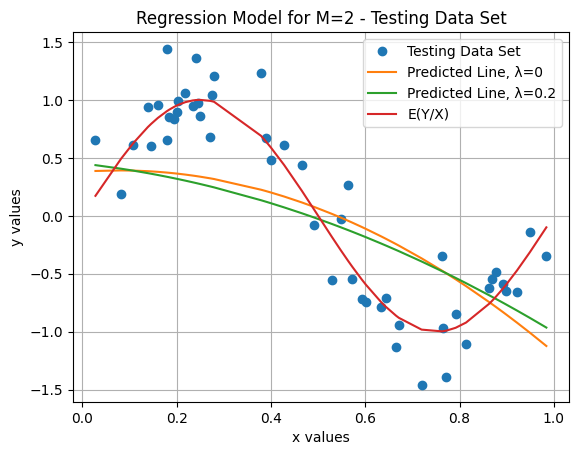

In [56]:
# M = 2
A2 = generateAMatrix(M = 2, X = x_train)
k = 0.2

# Normal Regression
u2 = train_regression_model(A2, y_train)
p2 = predict_regression_model(M = 2, X = x_cpy, u = u2)

# (e) estimated coefficients for M = 2, λ = 0
print("\nEstimated coefficients for M = 2, λ = 0: ", u2)

# (f) RMSE for λ = 0
rmse2 = RMSE(y_test, p2)
print("RMSE for λ = 0: ", rmse2)

# Regularized Regression
u2_r = train_regularized_regression_model(A2, y_train, k=k)
p2_r = predict_regression_model(M = 2, X = x_cpy, u = u2_r)

# (e) estimated coefficients for M = 2, λ = k
print(f"\nEstimated coefficients for M = 2, λ = {k}: ", u2_r)

# (f) RMSE for λ = k
rmse2_r = RMSE(y_test, p2_r)
print(f"RMSE for λ = {k}: ", rmse2_r, end="\n\n")

# (h)
plt.plot(x_test, y_test, 'o', label='Testing Data Set')
plt.plot(x_cpy, p2, label=f'Predicted Line, λ=0')
plt.plot(x_cpy, p2_r, label=f'Predicted Line, λ={k}')
plt.plot(x_cpy, np.sin(2 * np.pi * x_cpy), label='E(Y/X)')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Regression Model for M=2 - Testing Data Set')
plt.legend()
plt.grid()
plt.show()

<h4> Regression Model for $M=3$.
<h5> (i) For Training Data Set


Estimated coefficients for M = 3, λ = 0:  [ 19.33625567 -30.00677277  10.88024417  -0.25829857]
RMSE for λ = 0:  0.8096733856330093

Estimated coefficients for M = 3, λ = 0.1:  [-0.13943357 -1.05543515 -0.32428778  0.44586532]
RMSE for λ = 0.1:  0.7347067554978565



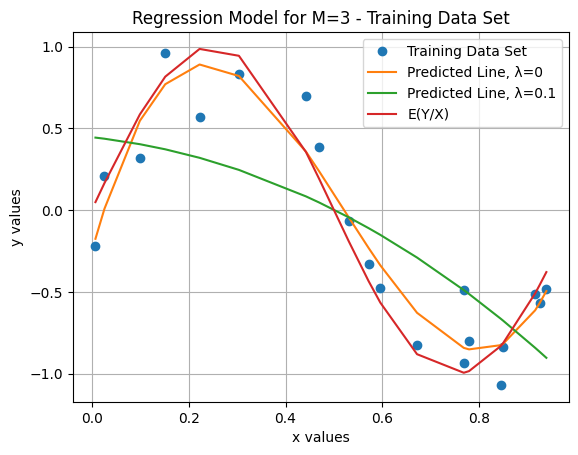

In [57]:
# M = 3
A3_tr = generateAMatrix(M = 3, X = x_train)
k_tr = 0.1

# Normal Regression
u3_tr = train_regression_model(A3_tr, y_train)
p3_tr = predict_regression_model(M = 3, X = x_cpy_tr, u = u3_tr)

# (e) estimated coefficients for M = 3, λ = 0
print("\nEstimated coefficients for M = 3, λ = 0: ", u3_tr)

# (f) RMSE for λ = 0
rmse3_tr = RMSE(y_train, p3_tr)
print("RMSE for λ = 0: ", rmse3_tr)

# Regularized Regression
u3_tr_r = train_regularized_regression_model(A3_tr, y_train, k=k_tr)
p3_tr_r = predict_regression_model(M = 3, X = x_cpy_tr, u = u3_tr_r)

# (e) estimated coefficients for M = 3, λ = k
print(f"\nEstimated coefficients for M = 3, λ = {k_tr}: ", u3_tr_r)

# (f) RMSE for λ = k_tr
rmse3_tr_r = RMSE(y_train, p3_tr_r)
print(f"RMSE for λ = {k_tr}: ", rmse3_tr_r, end="\n\n")

# (g)
plt.plot(x_train, y_train, 'o', label='Training Data Set')
plt.plot(x_cpy_tr, p3_tr, label=f'Predicted Line, λ=0')
plt.plot(x_cpy_tr, p3_tr_r, label=f'Predicted Line, λ={k_tr}')
plt.plot(x_cpy_tr, np.sin(2 * np.pi * x_cpy_tr), label='E(Y/X)')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Regression Model for M=3 - Training Data Set')
plt.legend()
plt.grid()
plt.show()

<h5> (ii) For Testing Data Set


Estimated coefficients for M = 3, λ = 0:  [ 19.33625567 -30.00677277  10.88024417  -0.25829857]
RMSE for λ = 0:  1.0367459379813413

Estimated coefficients for M = 3, λ = 0.1:  [-0.13943357 -1.05543515 -0.32428778  0.44586532]
RMSE for λ = 0.1:  0.9248322125705738



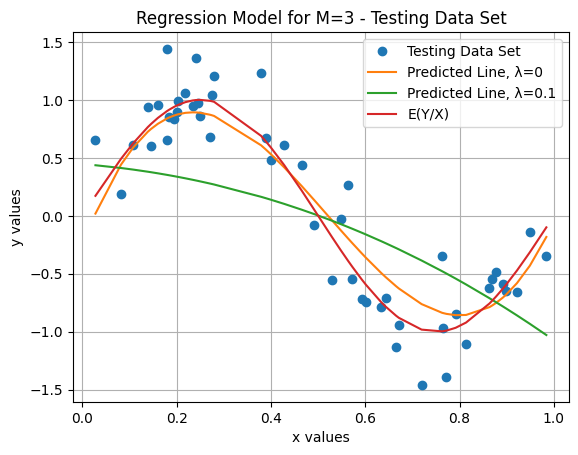

In [58]:
# M = 3
A3 = generateAMatrix(M = 3, X = x_train)
k = 0.1

# Normal Regression
u3 = train_regression_model(A3, y_train)
p3 = predict_regression_model(M = 3, X = x_cpy, u = u3)

# (e) estimated coefficients for M = 3, λ = 0
print("\nEstimated coefficients for M = 3, λ = 0: ", u3)

# (f) RMSE for λ = 0
rmse3 = RMSE(y_test, p3)
print("RMSE for λ = 0: ", rmse3)

# Regularized Regression
u3_r = train_regularized_regression_model(A3, y_train, k=k)
p3_r = predict_regression_model(M = 3, X = x_cpy, u = u3_r)

# (e) estimated coefficients for M = 3, λ = k
print(f"\nEstimated coefficients for M = 3, λ = {k}: ", u3_r)

# (f) RMSE for λ = k
rmse3_r = RMSE(y_test, p3_r)
print(f"RMSE for λ = {k}: ", rmse3_r, end="\n\n")

# (h)
plt.plot(x_test, y_test, 'o', label='Testing Data Set')
plt.plot(x_cpy, p3, label='Predicted Line, λ=0')
plt.plot(x_cpy, p3_r, label=f'Predicted Line, λ={k}')
plt.plot(x_cpy, np.sin(2 * np.pi * x_cpy), label='E(Y/X)')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Regression Model for M=3 - Testing Data Set')
plt.legend()
plt.grid()
plt.show()

<h4> Regression Model for $M=9$.
<h5> (i) For Training Data Set


Estimated coefficients for M = 9, λ = 0:  [-1.54910237e+04  6.84289077e+04 -1.25157659e+05  1.22193537e+05
 -6.83801576e+04  2.18695312e+04 -3.73915775e+03  2.74534210e+02
  1.21193451e+00 -1.44803415e-01]
RMSE for λ = 0:  0.8377747487856063

Estimated coefficients for M = 9, λ = 0.1:  [ 0.84673605  0.72735282  0.54222573  0.27019864 -0.10917494 -0.59835197
 -1.12223708 -1.32059587  0.14488632  0.44094714]
RMSE for λ = 0.1:  0.7318505817162454



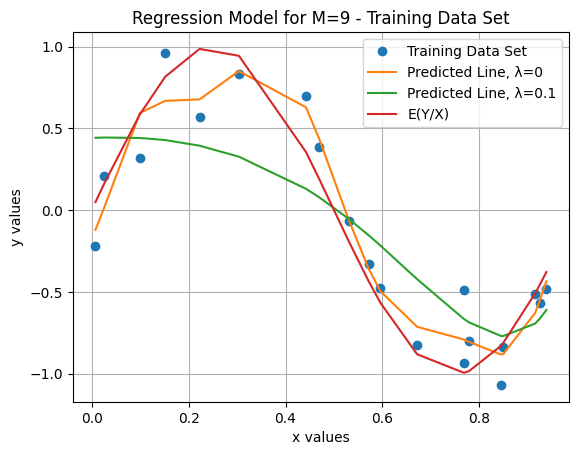

In [59]:
# M = 3
A9_tr = generateAMatrix(M = 9, X = x_train)
k_tr = 0.1

# Normal Regression
u9_tr = train_regression_model(A9_tr, y_train)
p9_tr = predict_regression_model(M = 9, X = x_cpy_tr, u = u9_tr)

# (e) estimated coefficients for M = 9, λ = 0
print("\nEstimated coefficients for M = 9, λ = 0: ", u9_tr)

# (f) RMSE for λ = 0
rmse9_tr = RMSE(y_train, p9_tr)
print("RMSE for λ = 0: ", rmse9_tr)

# Regularized Regression
u9_tr_r = train_regularized_regression_model(A9_tr, y_train, k=k_tr)
p9_tr_r = predict_regression_model(M = 9, X = x_cpy_tr, u = u9_tr_r)

# (e) estimated coefficients for M = 9, λ = k
print(f"\nEstimated coefficients for M = 9, λ = {k_tr}: ", u9_tr_r)

# (f) RMSE for λ = k_tr
rmse9_tr_r = RMSE(y_train, p9_tr_r)
print(f"RMSE for λ = {k_tr}: ", rmse9_tr_r, end="\n\n")

# (g)
plt.plot(x_train, y_train, 'o', label='Training Data Set')
plt.plot(x_cpy_tr, p9_tr, label=f'Predicted Line, λ=0')
plt.plot(x_cpy_tr, p9_tr_r, label=f'Predicted Line, λ={k_tr}')
plt.plot(x_cpy_tr, np.sin(2 * np.pi * x_cpy_tr), label='E(Y/X)')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Regression Model for M=9 - Training Data Set')
plt.legend()
plt.grid()
plt.show()

<h5> (ii) For Testing Data Set


Estimated coefficients for M = 9, λ = 0:  [-1.54910237e+04  6.84289077e+04 -1.25157659e+05  1.22193537e+05
 -6.83801576e+04  2.18695312e+04 -3.73915775e+03  2.74534210e+02
  1.21193451e+00 -1.44803415e-01]
RMSE for λ = 0:  1.033988898516276

Estimated coefficients for M = 9, λ = 0.1:  [ 0.84673605  0.72735282  0.54222573  0.27019864 -0.10917494 -0.59835197
 -1.12223708 -1.32059587  0.14488632  0.44094714]
RMSE for λ = 0.1:  0.930196891930627



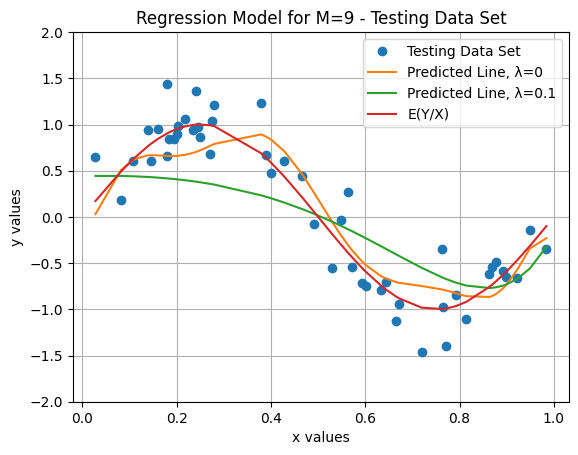

In [60]:
# M = 9
A9 = generateAMatrix(M = 9, X = x_train)
k = 0.1

# Normal Regression
u9 = train_regression_model(A9, y_train)
p9 = predict_regression_model(M = 9, X = x_cpy, u = u9)

# (e) estimated coefficients for M = 9, λ = 0
print("\nEstimated coefficients for M = 9, λ = 0: ", u9)

# (f) RMSE for λ = 0
rmse9 = RMSE(y_test, p9)
print("RMSE for λ = 0: ", rmse9)

# Regularized Regression
u9_r = train_regularized_regression_model(A9, y_train, k=k)
p9_r = predict_regression_model(M = 9, X = x_cpy, u = u9_r)

# (e) estimated coefficients for M = 9, λ = k
print(f"\nEstimated coefficients for M = 9, λ = {k}: ", u9_r)

# (f) RMSE for λ = k
rmse9_r = RMSE(y_test, p9_r)
print(f"RMSE for λ = {k}: ", rmse9_r, end="\n\n")

# (h)
plt.plot(x_test, y_test, 'o', label='Testing Data Set')
plt.plot(x_cpy, p9, label=f'Predicted Line, λ=0')
plt.plot(x_cpy, p9_r, label=f'Predicted Line, λ={k}')
plt.plot(x_cpy, np.sin(2 * np.pi * x_cpy), label='E(Y/X)')
plt.xlabel('x values')
plt.ylabel('y values')
plt.ylim(-2, 2)
plt.title('Regression Model for M=9 - Testing Data Set')
plt.legend()
plt.grid()
plt.show()

<p> (i) Study the effect of regularization parameter $λ$ on testing RMSE and flexibility of curve and list your observations.

<p align="justify"> As we saw in the above examples, the regularization parameter controls the flexibility and RMSE of a model. With low $λ$ (near zero), the curve is highly flexible and fits the training dataset very closely. This may cause overfitting. Also Additionally, a low value of $λ$ leads to higher testing RMSE due to the curve's flexibility. When we increase $λ$, the curve's flexibility reduces, and the curve becomes more rigid. This avoids overfitting and reduces testing RMSE. But a very high value of $λ$ may lead to underfitting and high RMSE.